In [111]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [112]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [113]:
import numpy as np
import pandas as pd
import time
import seaborn as sns 

# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline

#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap
import umap.umap_ as umap

import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('Wine_Quality_Data.csv')
print(df)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

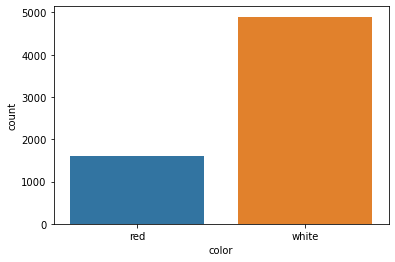

In [115]:

y = df.color
ax = sns.countplot(y,label="Count") 


From this dataset I want to see how easy it is to predict whether a wine is red or white. As we can see above there are more whites than reds, so this is an imbalanced dataset to start off. We will transform this variable into a binary where white is 1 and red is 0.

In [116]:
df['color_binary'] = np.where(df['color']== 'white', 1, 0)
df.drop(['color'], axis=1)
df.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_binary
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Now that all the fields in the dataset are numeric we can start to do dimension reduction on the dataset. But first we need to normalize the data set. 

In [117]:
input = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]

# normalizing with mean of 0 and sd of 1
newdf = (input-input.mean())/input.std()

newdf['RW_Binary'] = df['color_binary']

<AxesSubplot:>

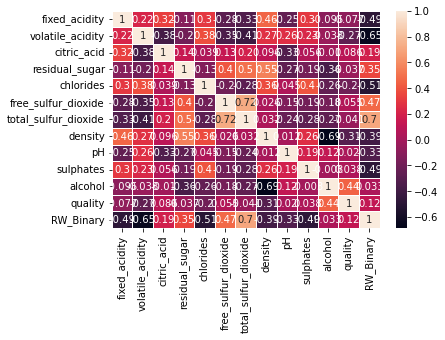

In [138]:

sns.heatmap(newdf.corr(), annot=True, linewidths=1)

In [118]:
newdf.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,RW_Binary
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6497.000000
mean,9.396824e-16,-2.652262e-14,4.807301e-14,-2.252111e-15,1.278241e-14,-6.367933e-17,-5.225926e-16,2.255350e-12,-3.317152e-14,-6.607989e-15,-1.231775e-14,-3.741030e-15,0.753886
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.430779
min,-2.634386e+00,-1.577208e+00,-2.192664e+00,-1.017956e+00,-1.342536e+00,-1.663455e+00,-1.941631e+00,-2.529997e+00,-3.100376e+00,-2.091774e+00,-2.089189e+00,-3.227439e+00,0.000000
25%,-6.288845e-01,-6.661100e-01,-4.722972e-01,-7.657389e-01,-5.147590e-01,-7.620156e-01,-6.854795e-01,-7.858922e-01,-6.748102e-01,-6.805395e-01,-8.315512e-01,-9.371575e-01,1.000000
50%,-1.660764e-01,-3.016707e-01,-5.940918e-02,-5.135217e-01,-2.578628e-01,-8.593639e-02,3.990360e-02,6.448391e-02,-5.287017e-02,-1.429263e-01,-1.608107e-01,2.079830e-01,1.000000
75%,3.738663e-01,3.664680e-01,4.911081e-01,5.584015e-01,2.559297e-01,5.901428e-01,7.122099e-01,7.647937e-01,6.312639e-01,4.618885e-01,6.776148e-01,2.079830e-01,1.000000
max,6.698910e+00,7.533774e+00,9.230570e+00,1.268585e+01,1.584097e+01,1.456245e+01,5.736815e+00,1.476765e+01,4.922650e+00,9.870119e+00,3.695947e+00,3.643405e+00,1.000000


In [119]:
newdf.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,RW_Binary
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,-0.937157,0
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023,-0.937157,0
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023,-0.937157,0
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023,0.207983,0
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,-0.937157,0


In [120]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,color_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [121]:
pca = PCA(n_components=13)
pca_result = pca.fit_transform(newdf)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


print(pca_result)

Explained variation per principal component: [0.26078646 0.21787853 0.13471022 0.08789264 0.06912533 0.05420191
 0.04638606 0.04241355 0.03780537 0.02460238 0.01905357 0.00376493
 0.00137906]
[[ 3.46199706  0.3878152  -2.72487308 ... -0.08091968 -0.03193824
   0.06686114]
 [ 3.37635617  1.02146806 -1.99629668 ... -0.25035642 -0.0534513
   0.0278589 ]
 [ 3.37004447  0.7763792  -1.7440076  ... -0.08034504  0.03954471
   0.03050799]
 ...
 [-0.70475949 -0.59250921 -0.14943382 ... -0.35743299  0.11338412
   0.11809635]
 [-0.7317166  -3.72414374 -0.08163332 ...  0.25501682  0.11320603
  -0.02850732]
 [-0.94923738 -2.7235939   0.17580477 ... -0.14860127  0.08178491
  -0.07844814]]


In [122]:
y_binary = newdf['RW_Binary']
newdf_nobinary = newdf.drop(['RW_Binary'], axis=1)

umap_results = umap.UMAP().fit_transform(newdf_nobinary,y_binary)
df['umap-one'] = umap_results[:,0]; df['umap-two'] = umap_results[:,1]
umap_results

array([[-5.838482 ,  7.596395 ],
       [-6.1694064,  7.1542253],
       [-6.054971 ,  7.034344 ],
       ...,
       [13.708992 ,  7.564951 ],
       [17.841526 , 11.672962 ],
       [13.561912 , 10.245617 ]], dtype=float32)

<AxesSubplot:xlabel='umap-one', ylabel='umap-two'>

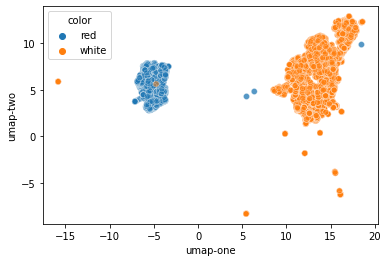

In [123]:
sns.scatterplot(x="umap-one", y="umap-two",hue=y,data=df,legend="full",alpha=0.5)

It seems here that UMAP can differieate the classes super easily.

In [124]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=5000)
tsne_results = tsne.fit_transform(newdf)
df['tsne-2d-one'] = tsne_results[:,0]; df['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.013s...
[t-SNE] Computed neighbors for 6497 samples in 0.743s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.142479
[t-SNE] KL divergence after 5000 iterations: 0.998428


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

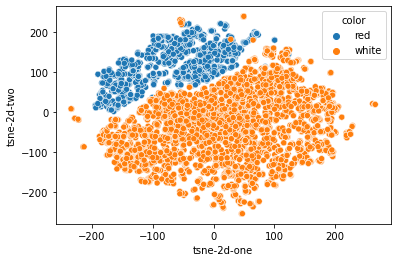

In [125]:
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=y,data=df,legend="full")

In [126]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(newdf_nobinary, y_binary, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Note: the max_iter=100 that you defined on the initializer is not in the grid. 
# So, that number will be constant, while the ones in the grid will be searched.

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

# Note: the parameter n_jobs is to define how many CPU cores from your computer to use 
# (-1 is for all the cores available). The cv is the number of splits for cross-validation.

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05, 0.1],
                         'hidden_layer_sizes': [(8, 4), (24, 12), (48, 24),
                                                (96, 48)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [127]:


# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))



0.990 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'constant', 'solver': 'sgd'}
0.995 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'constant', 'solver': 'adam'}
0.990 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.994 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.993 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'sgd'}
0.997 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'adam'}
0.993 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.996 (+/-0.004) for {'activatio

In [128]:


# Best parameter set
print('Best parameters found:\n', clf.best_params_)



Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (48, 24), 'learning_rate': 'constant', 'solver': 'adam'}


In [129]:


# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))



Confusion Matrix:
 [[ 429    5]
 [   3 1188]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       434
           1       1.00      1.00      1.00      1191

    accuracy                           1.00      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       1.00      1.00      1.00      1625



F-Test Feature Scores List: 
 [0.32141971 0.75528242 0.03512559 0.13770502 0.38347577 0.2996584
 1.         0.17820356 0.12255502 0.32368338 0.0011159  0.01503762]
Feature List: 
 Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object') 

Chi-Square Test Feature Scores List: 
 [0.23778976 0.6938119  0.0423436  0.20620697 0.26598514 0.38328706
 1.         0.08272969 0.10866318 0.23175308 0.00242344 0.01582899]
Feature List: 
 Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object') 

Mutual Information Feature Scores List: 
 [0.37977826 0.65940414 0.31691919 0.61709027 1.         0.45959486
 0.99087106 0.42860746 0.15277787 0.41590754 0.05061692 0.0335247

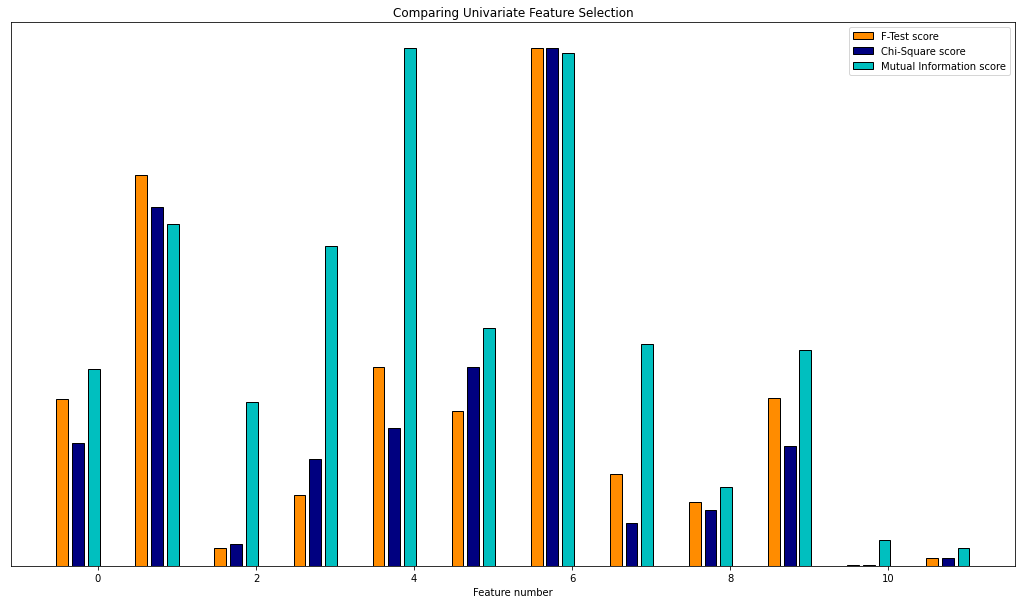

In [130]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# ---------------------------------------------------------------------------
# We should be selecting features using TRAINING Dataset and NOT FULL Dataset - Fix This
# ---------------------------------------------------------------------------

# Get ready to plot scores from Univariate Feature Selection Methods
plt.figure(figsize=(18,10)); plt.clf()
x_indices = np.arange(X_train.shape[-1])

# SelectKBest Features using F-Test
x_new_f = SelectKBest(f_classif, k=6)
x_new_f.fit_transform(X_train, y_train)
#scores = x_new_f.pvalues_
#scores = -np.log10(x_new_f.pvalues_)
scores = x_new_f.scores_
scores /= scores.max()
plt.bar(x_indices - .45, scores, width=.15,
        label='F-Test score', color='darkorange',
        edgecolor='black')

# Print Selected Features
print('F-Test Feature Scores List: \n', x_new_f.scores_)
print('Feature List: \n', X_train.columns, '\n')

# SelectKBest Features using Chi-Square Test
from sklearn.preprocessing import MinMaxScaler
# Here I put the data on a scale of 0 to 1 so that Chi square could take in the values. 
scaler = MinMaxScaler()
scaler.fit(X_train)
normed_data_ForChi2 =  scaler.transform(X_train)
x_new_chi2 = SelectKBest(chi2, k=6)
x_new_chi2.fit_transform(normed_data_ForChi2, y_train)
#scores = x_new_chi2.pvalues_
#scores = -np.log10(x_new_chi2.pvalues_)
scores = x_new_chi2.scores_
scores /= scores.max()
plt.bar(x_indices - .25, scores, width=.15,
        label='Chi-Square score', color='navy',
        edgecolor='black')

# Print Selected Features
print('Chi-Square Test Feature Scores List: \n', x_new_chi2.scores_)
print('Feature List: \n', X_train.columns, '\n')

# SelectKBest Features using Mutual Information
x_new_mi = SelectKBest(mutual_info_classif, k=6)
x_new_mi.fit_transform(X_train, y_train)
scores = x_new_mi.scores_
scores /= scores.max()
plt.bar(x_indices - .05, scores, width=.15,
        label='Mutual Information score', color='c',
        edgecolor='black')

# Print Selected Features
print('Mutual Information Feature Scores List: \n', x_new_mi.scores_)
print('Feature List: \n', X_train.columns, '\n')

# Finish Plotting
plt.title("Comparing Univariate Feature Selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

# Re-Run to Get Datasets
x_new_f = SelectKBest(f_classif, k=6).fit_transform(X_train, y_train)
x_new_chi2 = SelectKBest(chi2, k=6).fit_transform(normed_data_ForChi2, y_train)
x_new_mi = SelectKBest(mutual_info_classif, k=6).fit_transform(X_train, y_train)

# F- Test

In [139]:
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_,'\n')

# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'constant', 'solver': 'adam'} 

Confusion Matrix:
 [[ 429    5]
 [   1 1190]] 

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       434
           1       1.00      1.00      1.00      1191

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Chi Square

In [131]:

mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_,'\n')

# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'constant', 'solver': 'adam'} 

Confusion Matrix:
 [[ 429    5]
 [   1 1190]] 

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       434
           1       1.00      1.00      1.00      1191

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Mutual Information

In [132]:
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_, '\n')

# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (48, 24), 'learning_rate': 'adaptive', 'solver': 'adam'} 

Confusion Matrix:
 [[ 429    5]
 [   2 1189]] 

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       434
           1       1.00      1.00      1.00      1191

    accuracy                           1.00      1625
   macro avg       1.00      0.99      0.99      1625
weighted avg       1.00      1.00      1.00      1625



# Recursive Feature Elimination with Cross-Validation

In [133]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
# clf = MLPClassifier(activation='tanh', solver='adam', alpha=0.1, hidden_layer_sizes=(96,48), random_state=1)
clf = RandomForestClassifier() 

# "Accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(2), scoring='accuracy') #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal Number of Features :', rfecv.n_features_, '\n')
print('Best Features :', X_train.columns[rfecv.support_], '\n')

Optimal Number of Features : 11 

Best Features : Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object') 



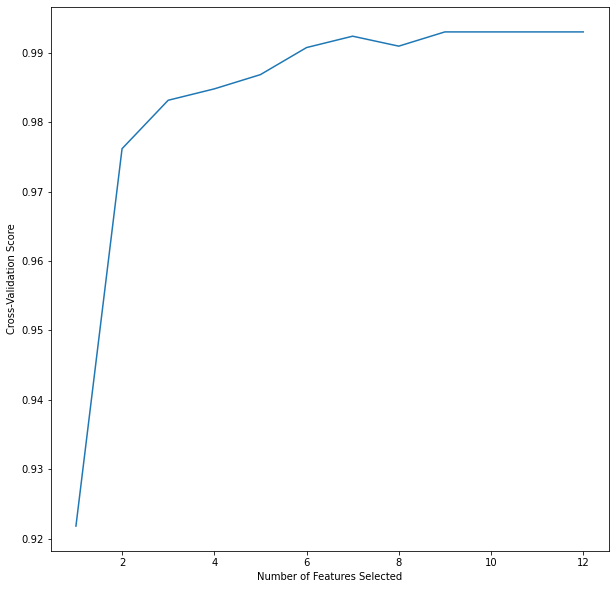

In [134]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [135]:
y_true, y_pred = y_test , rfecv.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Confusion Matrix:
 [[ 428    6]
 [   1 1190]] 

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       434
           1       0.99      1.00      1.00      1191

    accuracy                           1.00      1625
   macro avg       1.00      0.99      0.99      1625
weighted avg       1.00      1.00      1.00      1625

